In [3]:
import doc_tool
import db_helper
import re
import nltk
import networkx as nx
from datetime import datetime
from node2vec import Node2Vec

In [4]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import importlib

In [14]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30, 30)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [5]:
db = db_helper.DBHelper()
db.connect(user="root",passwd="Hasan5695*",db="cse496")

In [6]:
tweets = db.getTweets("denemeShort")

In [7]:
userIDs = db.getUniqueUserIDs("Friends")
friendIDs = db.getUserFriendIDs("Friends",userIDs[0])

In [8]:
print("UniqueUser #: ",len(userIDs))
print("Friend # of user:",userIDs[0]," is:",len(friendIDs))

UniqueUser #:  199
Friend # of user: 100341775  is: 612


In [9]:
# create friendship graph
startTime = datetime.now()
# I used DiGraph because of this state: 
#A follow B but B couldn't follow A, so there is no need to add edge
friendshipGraph=nx.Graph()

#run for first half of unique person and take half of friends
for userID in userIDs[:int(len(userIDs)/10)]:
    friendIDs = db.getUserFriendIDs("Friends",userID)
    for friendID in friendIDs[:int(len(friendIDs)/10)]:
        friendshipGraph.add_edge(userID,friendID)
endTime = datetime.now()
print("Graph construct time: ",endTime-startTime)

Graph construct time:  0:00:04.270232


In [10]:
# train, create new node2ve model
friendshipN2V = Node2Vec(friendshipGraph, dimensions=64, walk_length=20, num_walks=100, workers=2) 

Generating walks (CPU: 1): 100%|██████████| 34/34 [05:30<00:00, 12.33s/it]




In [11]:
# run/fit word2vec algorithm and get wv model
model = friendshipN2V.fit(window=10, min_count=1, batch_words=4)

In [26]:
model.wv.save_word2vec_format("../outputs/friendship_vw_format.model")

# Save model for later use
model.save("../outputs/friendship.model")

In [15]:
model.wv.most_similar("100341775")

[('1073309624', 0.7373084425926208),
 ('102105793', 0.7367502450942993),
 ('1076329207', 0.726550817489624),
 ('124147545', 0.7256461381912231),
 ('115216315', 0.7245758771896362),
 ('104926410', 0.7238134145736694),
 ('100751034', 0.7225210666656494),
 ('13383062', 0.7219160795211792),
 ('1215150620', 0.7218815088272095),
 ('1127512045', 0.7195311188697815)]

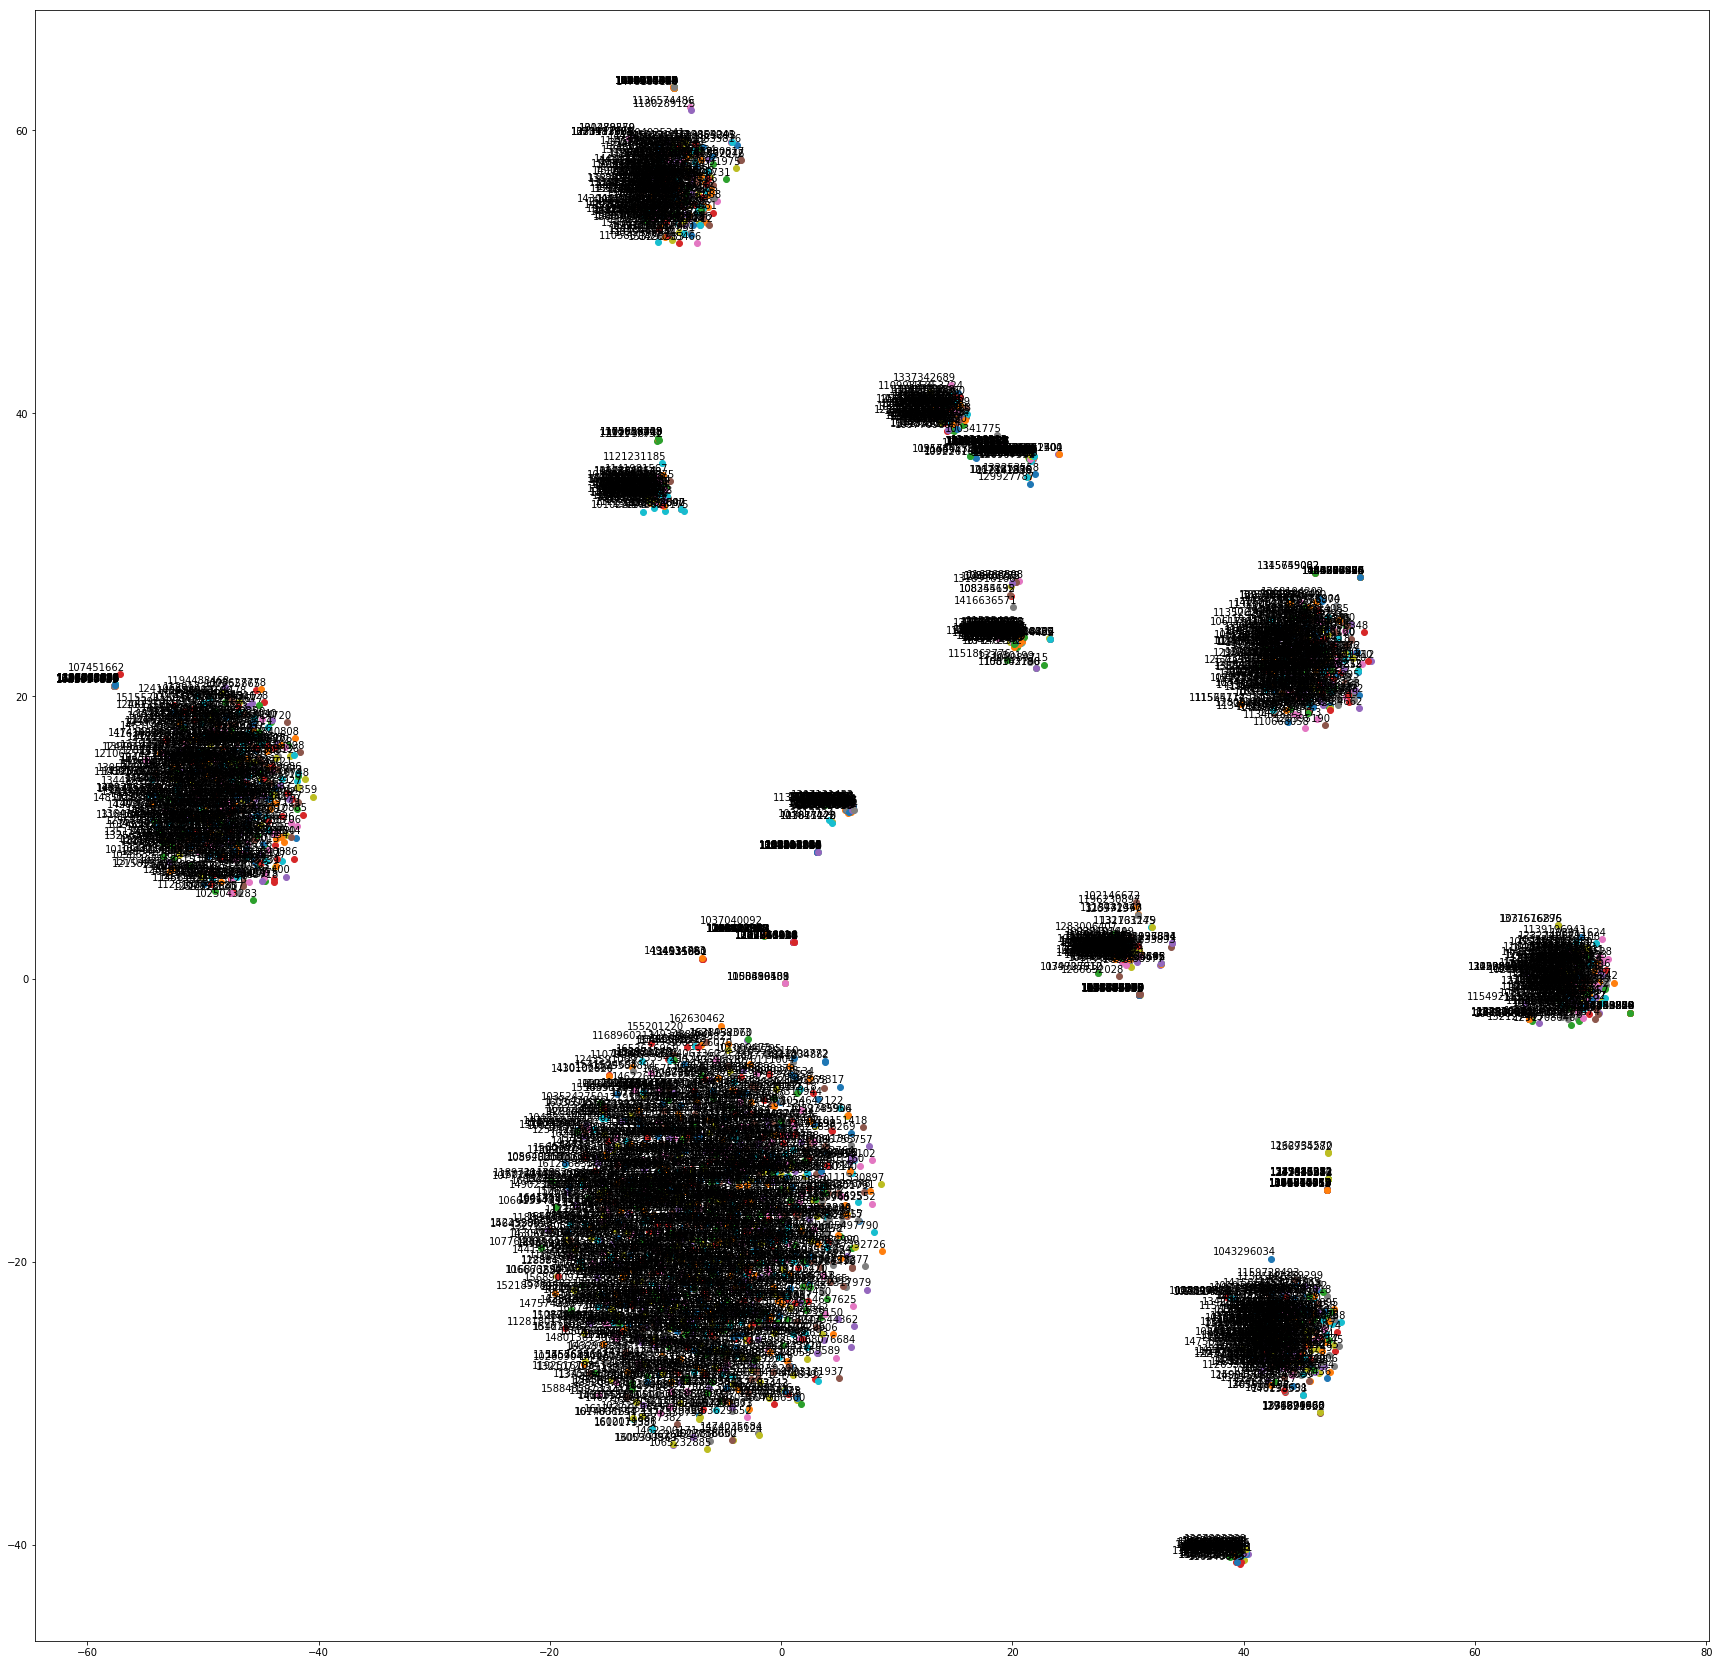

In [15]:
tsne_plot(model)

In [16]:
nx.draw_networkx(friendshipGraph,width=0.5,node_size=80,font_size=8,with_labels=True)

In [18]:
from gensim.models import word2vec

In [19]:
model2 = word2vec.Word2Vec.load("friendship.model")

In [25]:
model2.wv.most_similar("1073309624")

[('115216315', 0.9915549755096436),
 ('1035568326', 0.9900369644165039),
 ('100751034', 0.9900076389312744),
 ('114452294', 0.9899251461029053),
 ('1321952677', 0.9883931875228882),
 ('1321971956', 0.9881894588470459),
 ('1116377042', 0.9860410690307617),
 ('1140869882', 0.9858604073524475),
 ('100446187', 0.9853262901306152),
 ('130494271', 0.9851905107498169)]